In [ ]:
#import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#import data

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
#describe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#clean the data

In [9]:
df.duplicated().sum()
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Comment: since there is no null value, it's a pretty clean data set to start analysis

What is the attrition ratio?

In [15]:
#attrition ratio in pie chart
attrition_ratio = px.pie(df, names = 'Attrition', title = 'Attrition Raio', template = 'plotly_white',color_discrete_sequence=['pink', 'grey'])
attrition_ratio.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
attrition_ratio.show()

Comment: the employee attribution ratio is 16.1% at IBM.

For the analysis, we are going to focus on environmental and company's factors that could contribute to attribution.

2. What is the relationship between Job Role, Income, and Attrition Rate?

First, we will take a look at the relationship between Job Role and Attrition Rate?

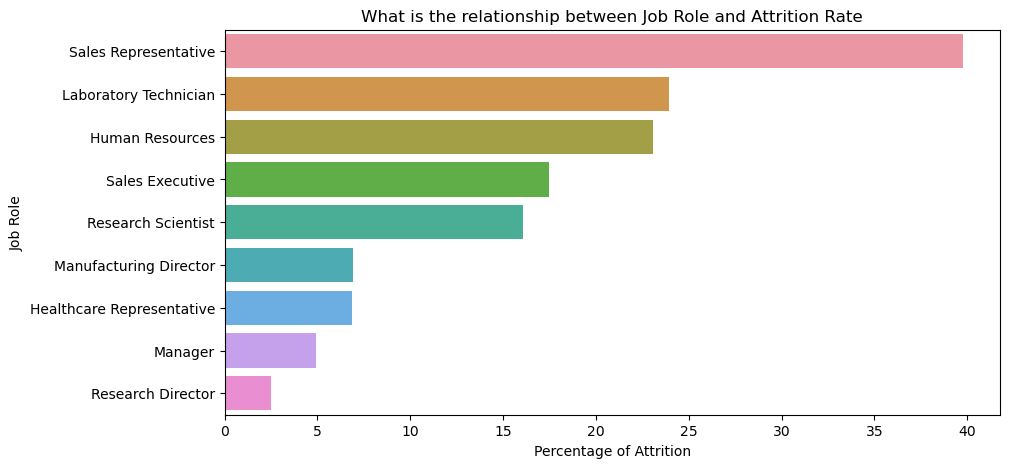

In [85]:
sns.set_palette('Set2')


df_attrition = df[df["Attrition"] == "Yes"]

df_attrition_size_eachrole = df_attrition.groupby("JobRole").size()

attritionrate_jobrole = df_attrition_size_eachrole / df.groupby("JobRole").size() * 100


attritionrate_jobrole_sorted = attritionrate_jobrole.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=attritionrate_jobrole_sorted.values, y=attritionrate_jobrole_sorted.index)

plt.xlabel("Percentage of Attrition")
plt.ylabel("Job Role")
plt.title("What is the relationship between Job Role and Attrition Rate?")
plt.show()

Comment: the bar graph reveals that the manager roles such as research director, manager, and munufacturing director tends to have lower attrition rate compared to lower level positions. 

Additionally, to add another layer, we want to see if the attrition rate has to do with monthly income. 

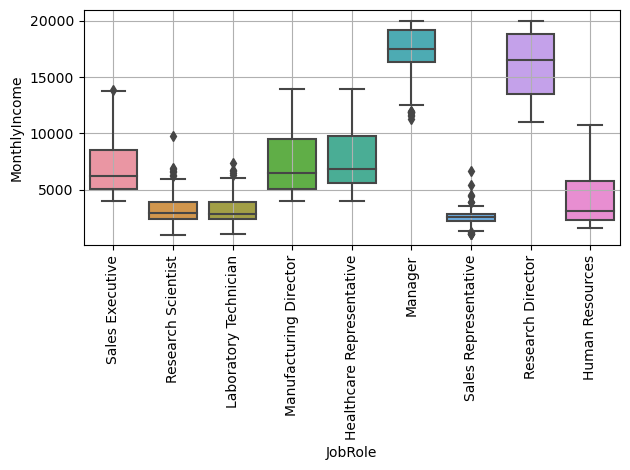

In [86]:
sns.set_palette('Set2')
#box plot to show the relationship between monthly income and job role
ax=sns.boxplot(y=df['MonthlyIncome'],x=df['JobRole'])
plt.setp(ax.get_xticklabels(), rotation=90)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

Comment: the overall picture of salaries affect attrition as much as the level of positions. The jobs that have the most attrition rate are the sales representatives and laboratory technician which are at the bottom of salary as well. However, research scientist, although has a similar range of income as laborary technician, has a much lower attrition rate which means the status of position also plays a role. 

Another reason that commonly causes attrition is interpersonal dissatisfication. Let's examine here:

Does the years with current manager affect attrition?

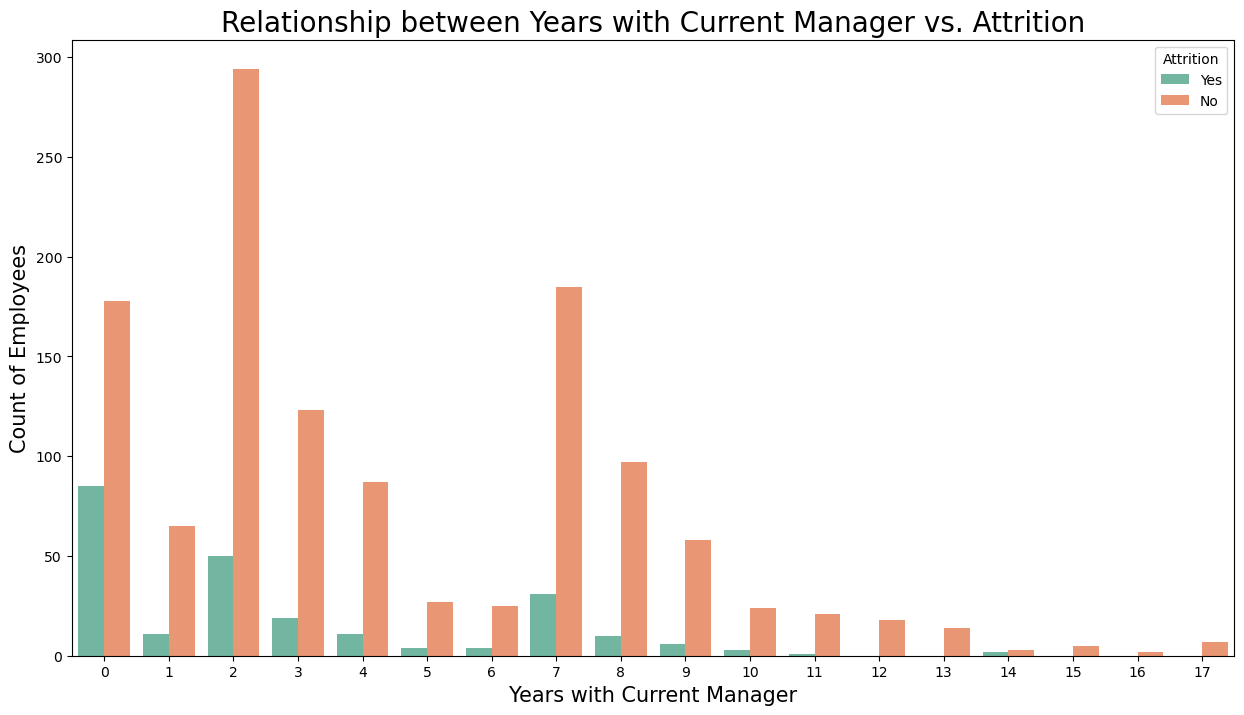

In [91]:
plt.figure(figsize=(15,8))

sns.countplot(x=df['YearsWithCurrManager'], hue='Attrition', data=df, palette="Set2")
plt.title('Relationship between Years with Current Manager vs. Attrition', fontsize=20)
plt.ylabel('Count of Employees', fontsize=15)
plt.xlabel('Years with Current Manager', fontsize=15)
plt.show()

Comment: from the graph above, we can tell there is a increse of attribution around the first year, the third year, and the eighth year. While attribution fluctuates in between, the rate generally goes does to almost zero after the eighth years. If the company wants to retain employees during long term, the HR team could initiate bonus programs and leadership appreciation program for the employees who are currently in the first, third, or eighth year with their managers. 

To further understand, we will look at the specific breakdown of years with high attrition.

1. The attributed employees that are first year with current Manager 

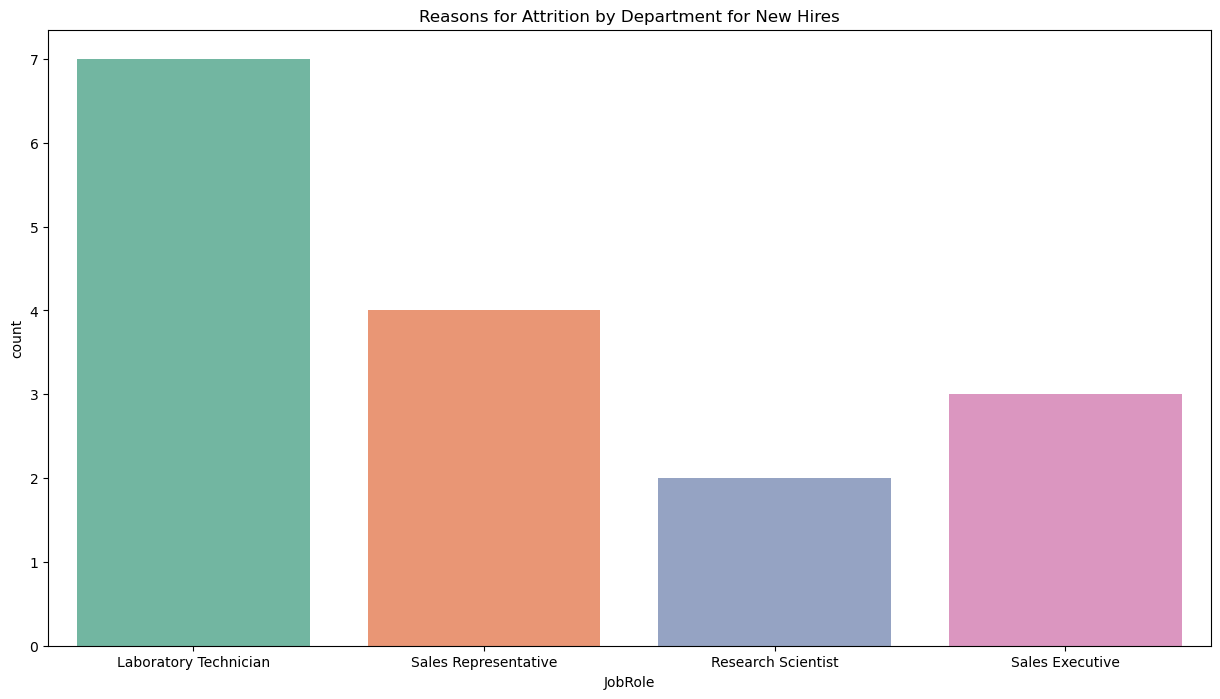

In [99]:
plt.figure(figsize=(15,8))
df_new_hires = df[(df["YearsAtCompany"] < 1) & (df["Attrition"] == "Yes")]
sns.countplot(x="JobRole", data=df_new_hires, palette="Set2")
plt.title("Reasons for Attrition by Department for New Hires")
plt.show()

#from the previous figure almost employees that leave comapny are laboratry technician in research & Development department, so that's mean there is a Mysterious thing

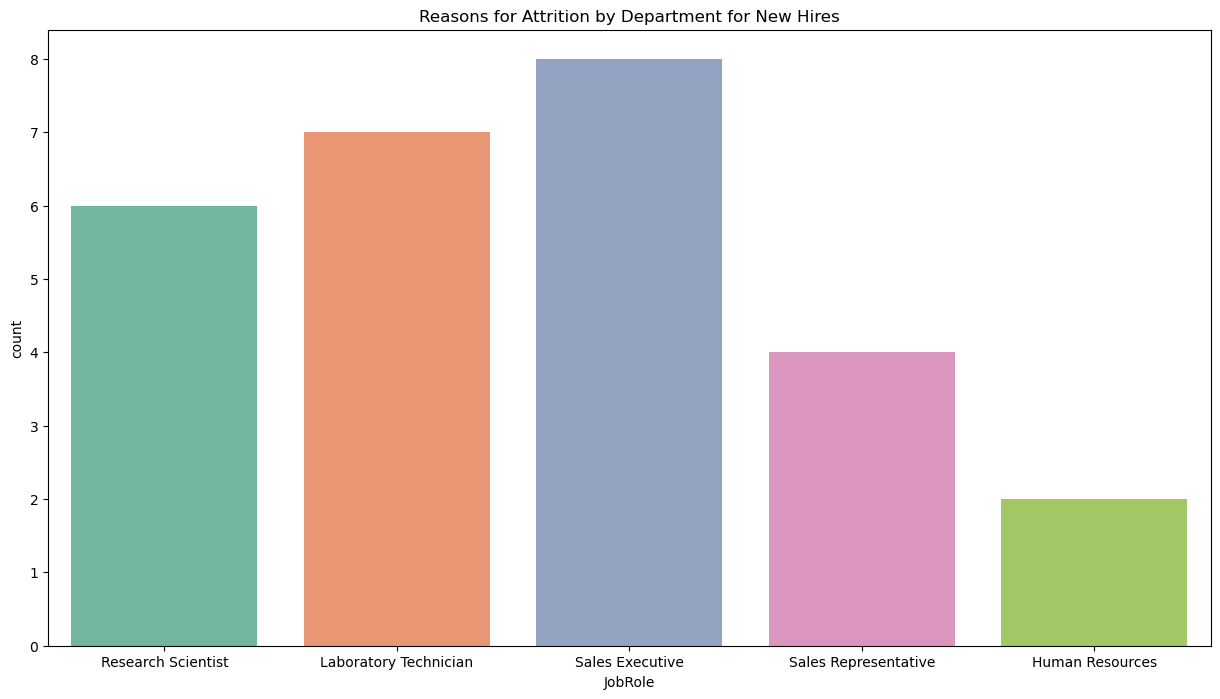

In [100]:
plt.figure(figsize=(15,8))
df_new_hires = df[(df["YearsAtCompany"] ==2) & (df["Attrition"] == "Yes")]
sns.countplot(x="JobRole",  data=df_new_hires, palette="Set2")
plt.title("Reasons for Attrition by Department for New Hires")
plt.show()

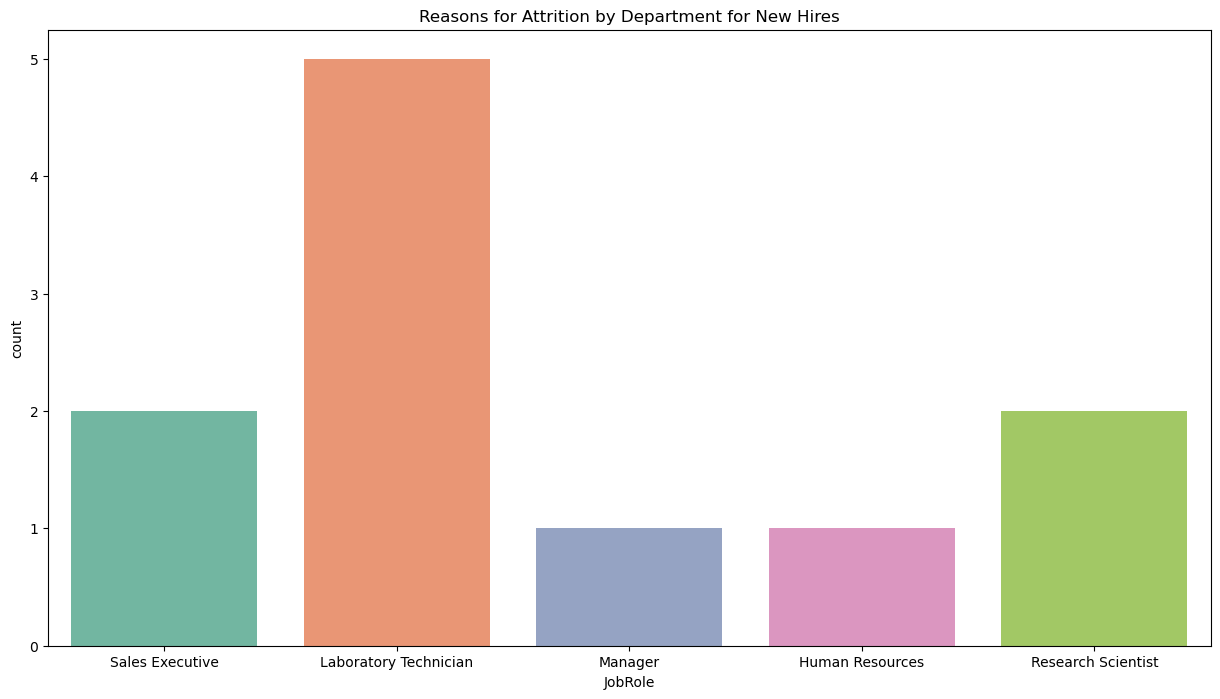

In [102]:
plt.figure(figsize=(15,8))
df_new_hires = df[(df["YearsAtCompany"] == 7) & (df["Attrition"] == "Yes")]
sns.countplot(x="JobRole", data=df_new_hires, palette="Set2")
plt.title("Reasons for Attrition by Department for New Hires")
plt.show()

Comment: the three graphs demonstrate a consistent trend that Laboratory Technician has a high attrition rate in general. At the same time, there is spike of attribution in sales executives and research scientist in their third year with the managers. For the future to lower attrition, IBM could provide check-in and incentives for sales executives and research scientist particularly at their third years. There seems to be a systematic reasoning with high attrition rate in the role of laboratory technician, which is worth investigate more.

Does work-life balance play a role in employees' attrition? 

What's the relationship between overtime and attrition? 

In [115]:
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [128]:
attrition_overtime = {
    'Attrition Rate Overtime': [(127 / (127 + 289)) * 100],
    'Attrition Rate No Overtime': [(110 / (110 + 944)) * 100]
}
attrition_overtime_df = pd.DataFrame(attrition_overtime)

In [130]:
plt.figure(figsize=(8, 8))
plt.pie(attrition_overtime_df.values(), labels=attrition_overtime_df.keys(), autopct='%1.1f%%', startangle=90, colors=['#FF69B4', '#A9A9A9'])
plt.title('Attrition Rate Distribution')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

<Figure size 800x800 with 0 Axes>

In [110]:
attrition_rate_overtime = df[df['OverTime']=='Yes'&df['Attrition']=='Yes'].count()/df[df['OverTime']=='Yes'].count()



#Does overtime stresses employees that lead to attrition 
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()

sizes = overtime_counts.values
labels = overtime_counts.index

# sizes = [sizes[2], sizes[3]]

labels = [labels[2][1], labels[3][1]]
# sizes[3]

overtime_counts

#pie chart 

fig = go.Figure()
fig.add_trace(go.Pie(values= [289, 127],title = 'Overtime X Attrition', labels=labels))

fig.update_layout(autosize=False, width=500, height=450)
fig.show()

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [107]:
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [ ]:
How does the amount of business travels affect Atrribution?

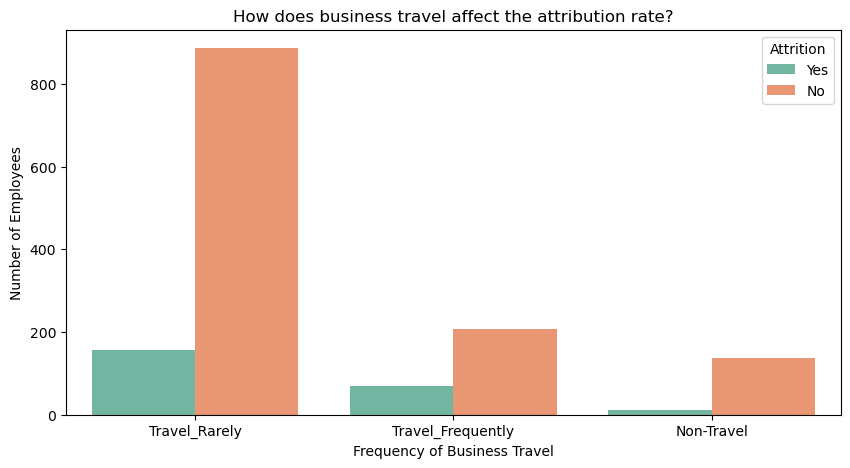

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette="Set2")
plt.title("How does business travel affect the attribution rate?")
plt.xlabel("Frequency of Business Travel")
plt.ylabel("Number of Employees")
plt.show()

Comment: from the comparison, the data does not show much correlation the travel frequency and correlation. 
Could calculate the percentage of attrition and compare again. 

#From the previous analysis, we conclude that the employees who are unable to balance work with life are the most frequent group leaving the company

Based on our previous analyses, we can say that the most important factors affecting employees attrition are:
1. Salary of the month: We found that employees with salaries of less than 5K are the most likely to leave their jobs
2. work enviroment: most of the employees leave their jobs when they are not comfortable in their work space
3. overtime when employees puted in stress and overtime, more than 30% leave the company

What type of measures should the company take in order to retain their employees?¶
1. We can increase the monthly salary a little or make bonuses
2. We can ask employees why they are not satisfied with the environment in which they work and try to fix this as much as possible
3. We make a schedule for employees to limit overtime, and if there is any employee who has a problem, we do not force him to work overtime

ml model: confusion matrix, random forest model

https://www.kaggle.com/code/usamaibraheem/ibm-employee-attrition-prediction

conclusion: 

1. After analyzing the factors contributing to attrition within the company, I have come up with several recommendations to help reduce attrition:

2. Improve employee engagement: Implement strategies to enhance employee engagement, such as regular feedback sessions, recognition programs, and opportunities for professional growth. Engaged employees are more likely to stay with the company.

3. Enhance work-life balance: Promote a healthy work-life balance by offering flexible work arrangements, encouraging employees to take breaks, and providing support for personal commitments. This can help reduce burnout and increase job satisfaction.

4. Strengthen communication channels: Foster open and transparent communication within the organization. Encourage managers to have regular check-ins with their team members, address concerns promptly, and provide clear expectations and feedback.

5. Offer competitive compensation and benefits: Conduct a thorough review of the company's compensation and benefits packages to ensure they are competitive within the industry. Providing fair and attractive rewards can help retain talented employees.

6. Provide opportunities for skill development: Invest in training and development programs to help employees enhance their skills and advance their careers within the company. This can increase job satisfaction and loyalty.

7. Foster a positive work culture: Create a supportive and inclusive work environment where employees feel valued and respected. Encourage teamwork, collaboration, and a sense of belonging.

8. Conduct exit interviews: When employees do leave the company, conduct exit interviews to gather feedback on their reasons for leaving. This information can help identify patterns and areas for improvement.

9. It is important to note that reducing attrition is an ongoing process that requires continuous monitoring and adjustment. By implementing these recommendations, the company can create a more engaging and supportive workplace, ultimately reducing attrition rates.

Based on analysis of this dataset, here are some positive proposals that can help reduce employee attrition and improve employee satisfaction:¶
Improve Work Environment: Focus on enhancing the work environment by implementing initiatives that promote a positive and supportive atmosphere. This can include providing opportunities for employee feedback, recognizing and rewarding employee contributions, and fostering work-life balance.

Employee Engagement Programs: Implement employee engagement programs to increase employee satisfaction and involvement. This can involve organizing team-building activities, promoting open communication channels, and encouraging collaboration among employees.

Professional Development Opportunities: Offer professional development opportunities, such as training programs, mentorship initiatives, and career advancement prospects. Providing employees with opportunities to learn and grow within the company can enhance their job satisfaction and increase their commitment to the organization.

Flexible Work Arrangements: Consider implementing flexible work arrangements, such as remote work options or flexible working hours, when feasible. This can contribute to improved work-life balance and increase employee retention.

Supportive Leadership: Encourage and train managers and supervisors to adopt a supportive leadership style. Effective leaders who provide guidance, support, and recognition can positively impact employee satisfaction and reduce attrition.

Regular Employee Feedback: Establish mechanisms for regular employee feedback, such as surveys or focus groups. Actively listen to employee concerns and suggestions, and take appropriate actions to address them. Demonstrating a commitment to employee well-being and actively addressing concerns can foster a positive work environment.